<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Newton's Method

To find the minimum or maximum of a function $f(x)$ is equivalent to finding the roots of its derivative $f'(x)$ if the function is twice differentiable.

We can approximate any function $f(x)$ using a Taylor series expansion around a point $x_n$:

$$ f(x) \approx f(x_n) + f'(x_n)(x - x_n) + \frac{f''(x_n)}{2}(x - x_n)^2 + \dots $$

or its derivative

$$ f'(x) \approx f'(x_n) + f''(x_n)(x - x_n) + \frac{f'''(x_n)}{2}(x - x_n)^2 + \dots $$

For small steps (i.e., when $x - x_n$ is small), the quadratic and higher-order terms become negligible. Thus, focusing on the linear term we get

$$ f'(x) \approx f'(x_n) + f''(x_n)(x - x_n). $$

To find the extremum of $f(x)$, set $f(x) = 0$ and solve for $x$:

$$ 0 \approx f'(x_n) + f''(x_n)(x - x_n) $$
$$ x \approx x_n - \frac{f'(x_n)}{f''(x_n)} $$

This provides us with the iterative formula for the Newton's method:

$$ x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)} $$

## Steps:

1. **Initialize**: Choose an initial guess $x_0$.

2. **Iterate**: Update $x_n$ using the formula: $x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}$.

3. **Convergence**: Repeat the above step until the difference between successive iterations is below a small threshold $\epsilon$: $|x_{n+1} - x_n| < \epsilon$.


In [11]:
library(ggplot2)

a <- 450
b <- 10

rosenbrock <- function(x) { (a - x)^2 + (b - x^2)^2 }
drosenbrock <- function(x) {  2*(a-x)*(-1) + 2*(b-x^2)*(-2)*x }
ddrosenbrock <- function(x)  { 2 + (-4)*((-2*x)*x+(b-x^2)) }

tangent.rosenbrock <- function(x0) { function(x) { rosenbrock(x0) + drosenbrock(x0) * (x-x0) } }
tangent.drosenbrock <- function(x0) { function(x) { drosenbrock(x0) + ddrosenbrock(x0) * (x-x0) } }
tangent.drosenbrock.inv <- function(x0) { function(y) { (y-drosenbrock(x0))/ ddrosenbrock(x0) + x0 } }

x <- seq(-b, 15, by=.1)
x0 <- 15      # -10 bad, 15 good
path <- c()   # empty collection

plt.f <- ggplot() +
  geom_line(aes(x=x, y=rosenbrock(x))) +  # the function
  ylim(190000, 240000)                    # fix limits of y axis

plt.df <- ggplot() +
  geom_line(aes(x=x, y=drosenbrock(x)), color = 'red') +   # the function
  geom_hline(yintercept = 0, color = 'grey') +             # the x-axis
  ylim(-5000, 13000)                                       # fix limits of y axis

options(warn = -1)

           x0      x0       x0       x0       x0       x0
[1,] 10.48084 7.89766 6.813468 6.608675 6.601691 6.601683


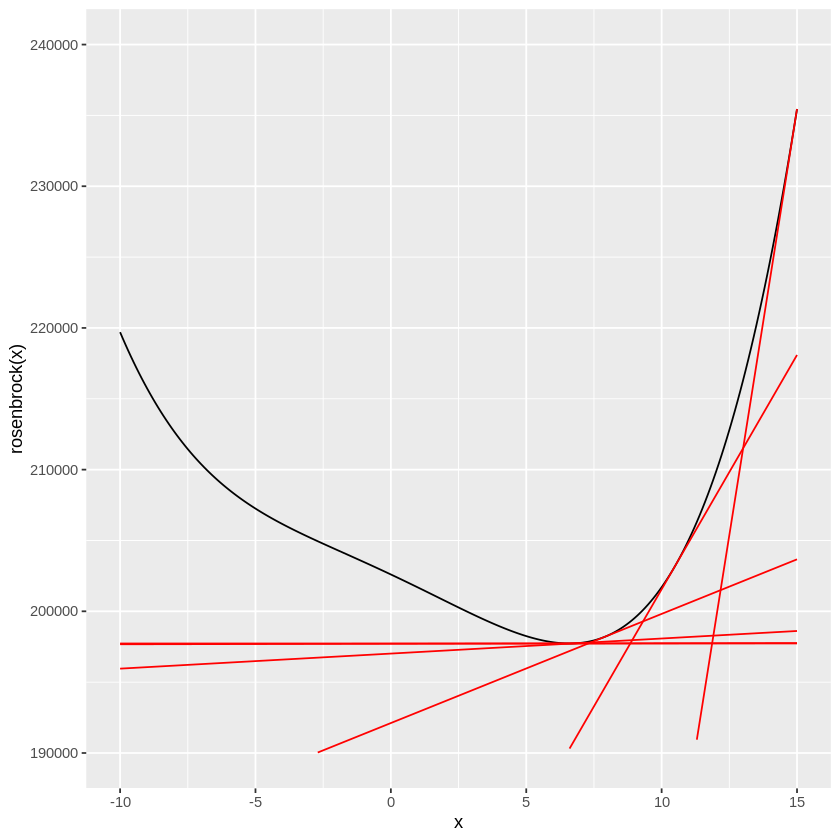

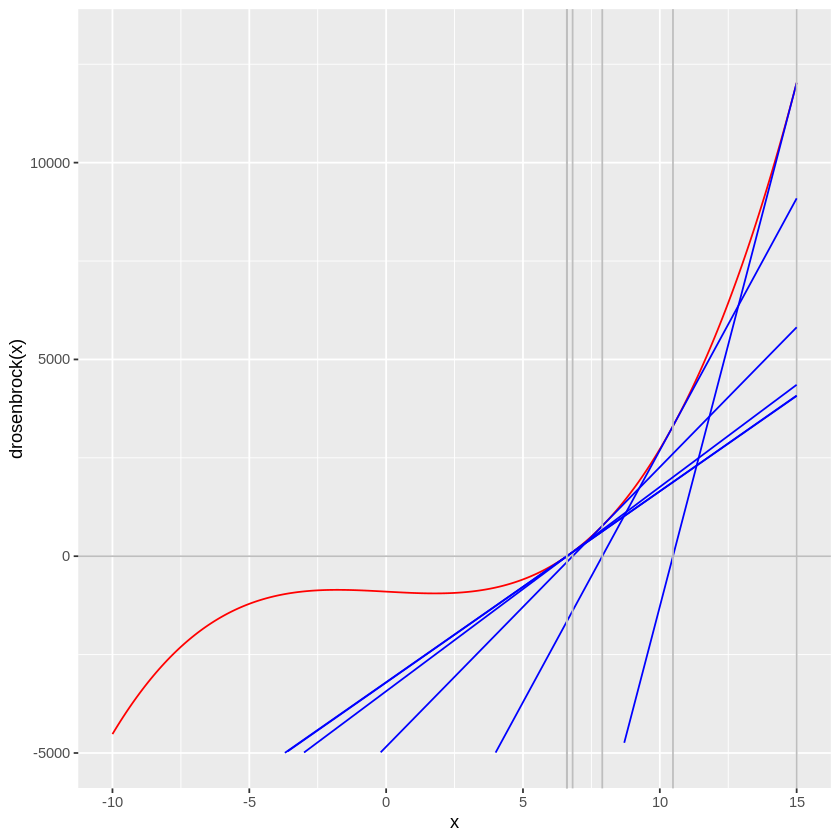

In [17]:
# keep adding steps, repeatedly run these lines until convergence is reached
# aes_string needs to be used here instead of aes, otherwise the functions are not recursively added but only at the final print (lazy evaluation)
plt.f <- plt.f + geom_line(aes_string(x=x, y=tangent.rosenbrock(x0)(x)), color='red')
plt.df <- plt.df + geom_line(aes_string(x=x, y=tangent.drosenbrock(x0)(x)), color='blue') + geom_vline(xintercept = x0, color = 'grey')
x0 <- tangent.drosenbrock.inv(x0)(0)
path <- cbind(path, x0)
print(path)
plt.f
plt.df